# Decision Tree Models
The Decision Tree model can be used to discover complex linear relationships between variables for either prediction, binary classification or multi-output classification. Obviously in this case I am looking for price prediction given a relatively small number of features.

Importing the dataset and dependancies is the first step.

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# import data
bitcoin = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")

# select data subset
df = pd.DataFrame(bitcoin).dropna(axis=0)

# select data for modeling
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

Initializing the linear model and fitting the regression line to the entire dataset based on predictors and labelled data first:

In [2]:
# instantiate model
lin_reg = linear_model.LinearRegression()

# fit model
lin_reg.fit(X, y)

LinearRegression()

In [3]:
lin_reg.coef_

array([-4.32747159e-01,  9.17019324e-01,  5.08535341e-01, -1.62880798e-09])

In [4]:
lin_reg.intercept_

104.14703757539974

Then, the entire dataset needs to be split and trained.

In [5]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
# predict
y_pred = lin_reg.predict(X_train)

Now trying a prediction on the working linear model (first 5 values):

In [7]:
print(y_pred[:5])

[14398.87824859 23615.43973771 43221.96880896 30312.88923232
 14945.24131451]


Measuring the RMSE and r-squared score for the linear model (based on training set):

In [8]:
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

r2_train = r2_score(y_train, y_pred)
print(r2_train)

677.2239361854425
0.9990817412202545


## Visualizing the Data
I think it's really important to view this relationship in graphical format and have elected to use the Seaborn and Matplotlib visualization packages, firstly to display time-series price data but also to fit a regression line over the plot so I can see just where the predictions lie.

In [9]:
# import the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [10]:
# Load the file path
bitcoin_filepath = "C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv"

# Read the file into a 'bitcoin' variable
bitcoin = pd.read_csv(bitcoin_filepath, index_col="Date", parse_dates=True)

## Plotting the Dependent Variable (y)

Text(0.5, 0, 'Date')

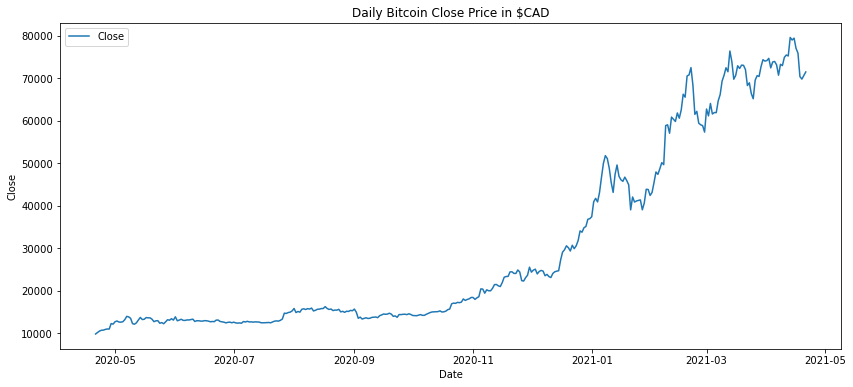

In [11]:
# Once again setting the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Bitcoin Close Price in $CAD")

# Line chart showing daily 'Close'
sns.lineplot(data=bitcoin["Close"], label="Close")

# Add label for horizontal axis
plt.xlabel("Date")

## Independent Variables (X)
I have excluded the 'Volume' feature from this particular graph as it's scaled differently and essentially I just want to see how the price data is generally following a similar trend. This tells me that the daily closing prices will generally trade within this band or range.

<AxesSubplot:>

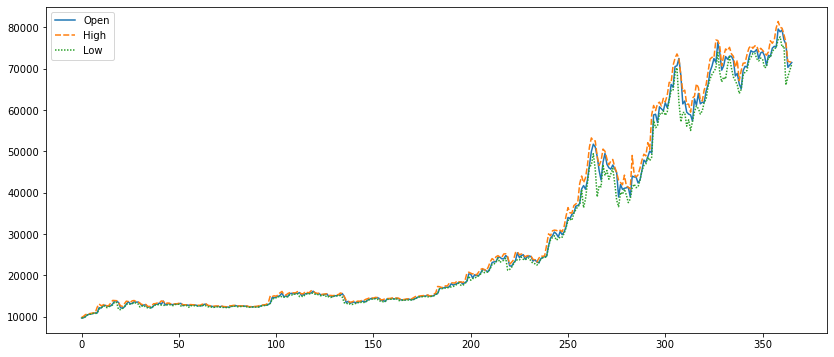

In [12]:
# select data for modeling
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# set the width and height of the plot
plt.figure(figsize=(14,6))

# line chart of daily Bitcoin prices
sns.lineplot(data=X[["Open", "High", "Low"]])

I wish to look at the correlation between the daily 'High' and 'Low' prices. It makes sense that these price boundaries move together in the same direction producing a strong positive correlation.

<AxesSubplot:xlabel='High', ylabel='Low'>

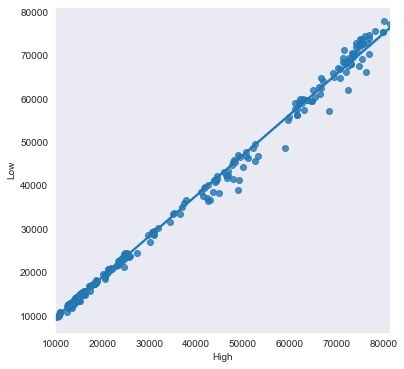

In [13]:
# changing the color theme in seaborn
sns.set_style("dark")

# set the width and height of the plot
plt.figure(figsize=(6,6))

# fit a regression line between high and low values to show linear nature
sns.regplot(x=df["High"], y=df["Low"])

In order to plot a line of best fit using Ordinary Least Squares I need to derive the polyfit module from the numpy library.

In [14]:
x = np.array(df["Open"])
y = np.array(df["Close"])
m, b = np.polyfit(x, y, 1)                  # m = slope, b = intercept
print(m)
print(b)

1.0011921547433411
122.11599989758197


Next, creating scatter plot and line of best fit for the open and close prices.

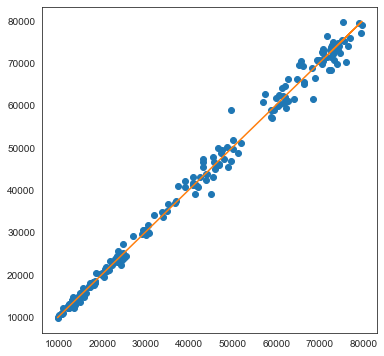

In [15]:
# changing the color theme in seaborn
sns.set_style("white")

# set the width and height of the plot
plt.figure(figsize=(6,6))
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

In [16]:
# import data
bitcoin = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")

# select data subset
df = pd.DataFrame(bitcoin).dropna(axis=0)

# select data for modeling
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

## Predictions
Looking at 'Actual' values for y:

In [17]:
y = df["Close"]
y.head()

0     9763.94
1    10096.28
2    10451.16
3    10642.81
4    10669.64
Name: Close, dtype: float64

Now look at the 'Predicted' values for y:

In [18]:
# try predicting y given X
y = lin_reg.predict(X)

# convert y to DataFrame
y_pred = pd.DataFrame(y)

# view the first 5 rows
y_pred.head()

,0
0,9792.447700
1,10045.060830
2,10382.778248
3,10609.762774
4,10693.638153


Below I have calculated y based on the following Multiple Regression formula:

    y = a + b1x1 + b2x2 + b3x3 + b4x4

So based on all the data contained within the matrix of values in 'X', how can I predict values in the vector 'y'? Once I have established the linear relationship between the dependent and independent variables, their I can summarize them in the following equation so I have decided to choose the first row of values from the dataset which shows the following data:

a = 104.14703757539974

b1 = -4.32747159e-01

x1 = 'Open' Price = 9718.07

b2 = 9.17019324e-01

x2 = 'High' Price = 9838.33

b3 = 5.08535341e-01

x3 = 'Low' Price = 9728.25

b4 = -1.62880798e-09

x4 = 'Volume' = 46,248,428,075

Remember, I am only using 'Open', 'High', 'Low' and 'Volume' features for values x1 to x4. The y (dependent variable) value for the 'Close' Price is based on these determinants (independent variables). So, plugging these values into the formula above produces an estimate for the 'Close' price I am using for the target variable.

In [19]:
y = 104.14703757539974 + (-4.32747159e-01*(9718.07)) + (9.17019324e-01*(9838.33)) + (5.08535341e-01*(9728.25)) + (-1.62880798e-09*(46248428075))
print(y)

9792.447702373423


Comparing the first entries of the actual 'y' value and the 'y_pred' estimate from Linear Regression gives me:

In [20]:
y = df["Close"]
print(y[:1])

0    9763.94
Name: Close, dtype: float64


And the predicted value

In [30]:
y = lin_reg.predict(X)
y_pred = pd.DataFrame(y)
print(y[:1])

[9792.44769993]


And comparing this linear regression prediction to the multiple regression formula for the first entry in the target data column

In [27]:
y = 104.14703757539974 + (-4.32747159e-01*(9718.07)) + (9.17019324e-01*(9838.33)) + (5.08535341e-01*(9728.25)) + (-1.62880798e-09*(46248428075))
print(y)

9792.447702373423


So the actual and expected prices have a difference of about C$30 but both methods of predicting the price are almost identical.

And once again finding the RMSE and r-squared for the linear model (based on the test set) this time:

In [28]:
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
    
r2_test = r2_score(y_test, y_pred)
print(r2_test)

455.4471597043939
0.9994954639778587


So this linear model appears to generalize well to the unseen (test) data having reduced the overall variance improving accuracy.

# Decision Tree Model Selection
Next, it's time to apply a Decision Tree model to the entire dataset before seeking further improvement.

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

TypeError: Singleton array array(9792.44770237) cannot be considered a valid collection.

In [ ]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# predict
y_pred = tree_reg.predict(X_train)

Now trying a prediction on the working linear model (first 5 values):

In [ ]:
print(y_pred[:5])

Measuring the RMSE and r-squared score for the linear model (based on training set):

In [ ]:
y_pred = tree_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
    
r2_train = r2_score(y_train, y_pred)
print(r2_train)

This definitely appears to be overfitting with perfect scores for both RMSE and r-squared. Let's see if there is a different outcome for the test data.

In [ ]:
y_pred = tree_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
    
r2_test = r2_score(y_test, y_pred)
print(r2_test)

This appears unlikely also. In order to establish a more likely outcome I will try dividing the dataframe into several smaller training and validation sets and perform the decision tree analysis on each. This is done using K-Fold Cross Validation.

## Cross Validation
This method will evaluate the Decsion Tree model by splitting the training set into several smaller training and validation sets for training and evaluation separately. This is achieved by using the K-fold cross validation technique and I have split the data into 10 separate folds, cv=10 (which can be changed).

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
r2_test = r2_score(y_test, y_pred)
                         
def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard Deviation", scores.std())
    print("R-Squared:", r2_test)
          
display_scores(tree_rmse_scores)

Comparing the scores from cross validation to those from the linear regression model:

In [ ]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

# Random Forest Model Selection
Next I will try the Random Forest Regressor model to try and improve on these scores and their accuracy. Using a Random Forest model should provide a more accurate prediction because it's an aggregate of several individual decision tree models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)

In [ ]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# predict
y_pred = forest_reg.predict(X_train)

Now trying a prediction on the working linear model (first 5 values):

In [ ]:
print(y_pred[:5])

Measuring the RMSE and r-squared score for the linear model (based on training set):

In [ ]:
y_pred = forest_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

r2_train = r2_score(y_train, y_pred)
print(r2_train)

In [ ]:
y_pred = forest_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

r2_test = r2_score(y_test, y_pred)
print(r2_test)

This generalizes well with the test set data but I aim to use the cross-validation method one more time.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
r2_test = r2_score(y_test, y_pred)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard Deviation", scores.std())
    print("R-Squared:", r2_test)
          
display_scores(tree_rmse_scores)

So the cross validation appears to have reduced the standard deviation considerably using the random forest ensemble method. Once again, I am comparing the scores from cross validation to those from the linear regression model as follows:

In [ ]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

So evaluating each of the 10 subsets using K-Folds Cross Validation has produced the most accurate score and lowest margin of error so far.

Saving the file as a pickle file will ensure some consistency when comparing scores, parameters and hyperparameters and enable me to start where I left off!

I first need import pickle and joblib.

In [ ]:
# pickle file to go here

# Print Dependencies
Dependences are fundamental to record the **computational environment**.   

- Use [watermark](https://github.com/rasbt/watermark) to print version of python, ipython, and packages, and characteristics of the computer

In [ ]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,watermark,tarfile,urllib3,matplotlib,seaborn,sklearn,joblib,pickle5 

# date
print (" ")
%watermark -u -n -t -z 